# Introduction

This notebook showcases the use of a simple neural network, as implemented in the neuralnet.py module. We test it on two simple artifical data sets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import tensor

In [2]:
from neuralnet import NNLearner

## Test 1 - learning the Heaviside function

Creating the dataset and visualising.

In [3]:
x  = [np.random.uniform(-2,2) for i in range(100)]
df = pd.DataFrame(zip(x,map(lambda x : float(x>0), x)))
df.columns = ['x','y']
df.head()

,x,y
0,-0.610698,0.0
1,1.151647,1.0
2,0.578903,1.0
3,0.163305,1.0
4,-0.557447,0.0


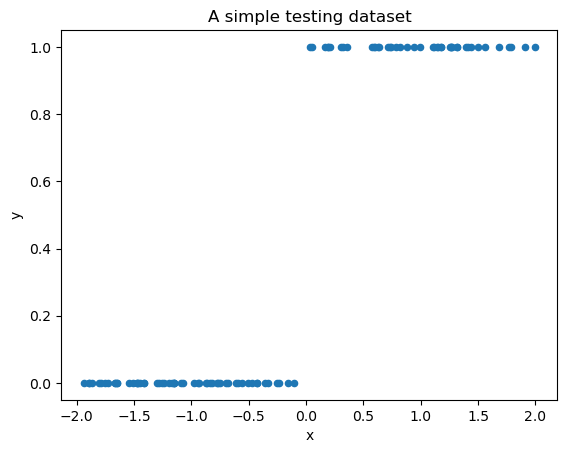

In [4]:
df.plot(x='x',y='y',kind='scatter',title='A simple testing dataset')
plt.show()

Here we use a simple logistic regression (i.e. a neural network with 0 hidden layers). The input to the learner is the dataframe, the name of the dependent column (in this case 'y'), as well as the desired learning rate, number of iterations and network geometry.

In [5]:
learn = NNLearner(df,'y', learningRate = 0.5, numIterations = 30, geometry = [])

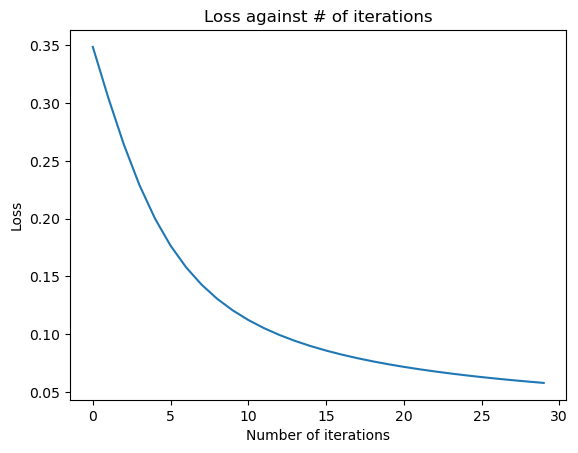

Training accuracy: 100%.


In [6]:
learn.learn()
learn.plotLosses()
print(f'Training accuracy: {learn.trainingAccuracy()*100:.0f}%.')

We can make predictions on new input like so:

In [7]:
learn.predictDf(df['x'])[0:10]

tensor([[0.2855],
        [0.8381],
        [0.6925],
        [0.5517],
        [0.3015],
        [0.1110],
        [0.8423],
        [0.7606],
        [0.9183],
        [0.1541]], dtype=torch.float64, grad_fn=<SliceBackward0>)

## Test 2 - a circular dataset

We create the dataset by using polar coordinates and the following helper function:

In [8]:
def random2Dpoint(scale):
    """
    Returns a random point in an annulus of radius ~scale.
    """
    theta = np.random.uniform(0,2*np.pi)
    r = np.random.rand() + scale
    return r*np.cos(theta),r*np.sin(theta)

In [9]:
numP = 100
points = [(*random2Dpoint(0),0.) for i in range(numP)] + [(*random2Dpoint(1),1.) for i in range(numP)]
df = pd.DataFrame(points)
df.columns = ['x1','x2','y']
df.head()

,x1,x2,y
0,-0.029271,-0.302324,0.0
1,0.868420,-0.300195,0.0
2,0.047562,-0.942263,0.0
3,0.181717,-0.317362,0.0
4,-0.070134,-0.281644,0.0


We plot the dataset to reveal its simple structure. Points are colored according to their y-value.

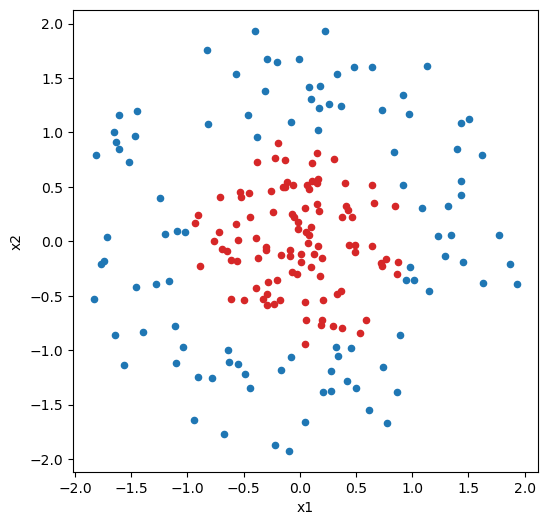

In [10]:
colors = {0. : 'tab:red', 1. : 'tab:blue'}
fig, ax = plt.subplots(figsize=(6, 6))

grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, x='x1', y='x2', kind='scatter', color=colors[key])
plt.show()

In [11]:
learn = NNLearner(df,'y', learningRate = 3, numIterations = 800, geometry = [10])

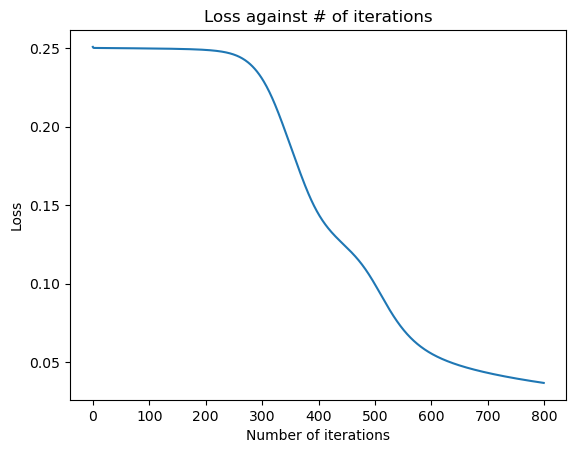

Training accuracy: 96%.


In [12]:
learn.learn()
learn.plotLosses()
print(f'Training accuracy: {learn.trainingAccuracy()*100:.0f}%.')